In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("house_price_dataset_800.csv")
df

,area_sqft,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,airconditioning,prefarea,price
0,961,1,3,2,2,yes,no,no,no,no,440583.29
1,1166,5,2,1,2,yes,yes,no,yes,yes,678002.08
2,795,1,2,2,2,no,no,no,no,yes,334415.37
3,1468,5,1,1,2,no,no,yes,yes,yes,575596.28
4,3089,5,2,1,0,no,no,no,no,yes,505591.14
...,...,...,...,...,...,...,...,...,...,...,...
795,3768,4,1,1,1,no,no,yes,no,yes,424680.35
796,3526,5,3,2,0,no,no,no,no,yes,599067.07
797,1750,1,1,1,0,no,no,no,yes,yes,293935.60
798,2896,3,3,2,0,yes,no,yes,yes,no,583430.77


In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i]=label.fit_transform(df[i])

df

,area_sqft,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,airconditioning,prefarea,price
0,961,1,3,2,2,1,0,0,0,0,440583.29
1,1166,5,2,1,2,1,1,0,1,1,678002.08
2,795,1,2,2,2,0,0,0,0,1,334415.37
3,1468,5,1,1,2,0,0,1,1,1,575596.28
4,3089,5,2,1,0,0,0,0,0,1,505591.14
...,...,...,...,...,...,...,...,...,...,...,...
795,3768,4,1,1,1,0,0,1,0,1,424680.35
796,3526,5,3,2,0,0,0,0,0,1,599067.07
797,1750,1,1,1,0,0,0,0,1,1,293935.60
798,2896,3,3,2,0,1,0,1,1,0,583430.77


In [6]:
x=df.drop("price",axis=1)
y=df["price"]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,area_sqft,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,airconditioning,prefarea
264,547,4,1,1,0,1,0,0,0,0
615,2065,1,3,3,0,1,0,0,1,0
329,2352,5,1,2,2,1,1,0,1,0
342,3201,2,1,1,0,1,0,0,1,1
394,1282,2,2,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,865,4,2,3,2,1,1,1,0,1
106,2370,3,1,2,2,1,0,0,0,0
270,3677,5,1,2,2,1,0,0,0,0
435,3323,2,1,1,1,1,1,0,1,1


In [8]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [9]:
y_pred=model.predict(x_test)
y_pred

array([388514.15, 399324.55, 453495.88, 207912.91, 411992.05, 442297.47,
       441412.56, 307502.21, 558388.44, 427716.27, 204469.9 , 668942.48,
       465813.82, 570074.86, 635440.95, 766405.84, 544409.76, 279490.3 ,
       560769.53, 482111.49, 472302.62, 620563.45, 477934.36, 327085.09,
       603257.14, 348106.47, 526627.94, 409540.98, 530356.  , 600429.81,
       748813.2 , 350349.69, 565812.24, 356045.59, 395029.89, 440622.36,
       406907.27, 570074.37, 620563.45, 608757.01, 635076.44, 341935.49,
       511123.85, 578889.87, 541950.47, 311602.73, 432892.75, 628456.77,
       551052.9 , 616091.45, 491196.05, 552725.26, 539058.19, 539764.72,
       643147.14, 526965.42, 432892.75, 541790.77, 643147.14, 408905.1 ,
       465813.82, 507967.03, 409320.13, 470461.74, 629875.88, 320901.77,
       408905.1 , 364572.46, 523948.04, 507850.17, 601031.63, 404973.42,
       375849.28, 505591.14, 339937.33, 440783.62, 726211.78, 339937.33,
       622556.84, 375009.45, 339312.56, 440783.62, 

In [10]:
msc=mean_squared_error(y_test,y_pred)
print(f"mean_squared_error:{msc}")

rmsc=np.sqrt(msc)
print(f"sqrt:{rmsc}")


mean_squared_error:3597789376.4916887
sqrt:59981.575308520274


In [11]:
score=r2_score(y_test,y_pred)
score

0.7309168432735488

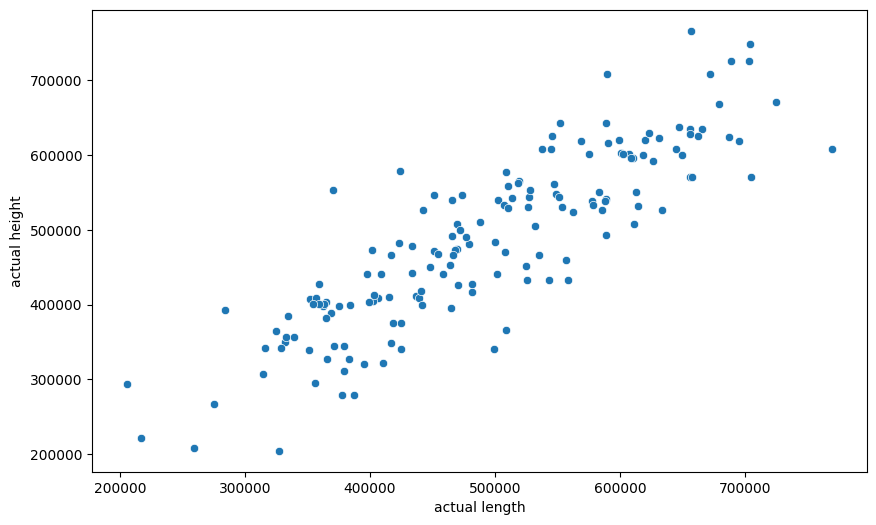

In [12]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("actual length")
plt.ylabel("actual height")
plt.show()